> 问题 1: 请进行分类汇总统计，计算不同国家 1995 年至 2020 年累计旅游总人数，从哪个国家旅游出发的人数最多，哪个国家旅游到达的人数最多？

### 读取数据

In [ ]:
import pandas as pd

# 读取CSV文件，使用GBK编码
csv_file = './data/A.csv'  # 替换为您的CSV文件路径
data = pd.read_csv(csv_file, encoding='GBK')
data

### 分类汇总统计

In [9]:
# 按国家进行分类汇总统计
grouped_by_country = data.groupby('旅游出发国家')['国际旅游人数'].sum()
grouped_by_country_departure = data.groupby('出发国家缩写')['国际旅游人数'].sum()
grouped_by_country_arrival = data.groupby('到达国家缩写')['国际旅游人数'].sum()

# 找出累计旅游总人数最高的国家
most_total_tourists_departure = grouped_by_country_departure.idxmax()
total_tourists_count_departure = grouped_by_country_departure.max()

most_total_tourists_arrival = grouped_by_country_arrival.idxmax()
total_tourists_count_arrival = grouped_by_country_arrival.max()

### 结果打印

In [ ]:
# 输出结果
print(grouped_by_country)
print(f"旅游出发人数最多的国家: {most_total_tourists_departure}，人数：{total_tourists_count_departure}")
print(f"旅游到达人数最多的国家: {most_total_tourists_arrival}，人数：{total_tourists_count_arrival}")


### 存储为文件

txt格式

In [22]:
output_file = './data/Q1_output/output.txt'
with open(output_file, 'a') as f:
    f.write("国家,累计旅游人数\n")
    for country, tourists in grouped_by_country.items():
        f.write(f"{country},{tourists}\n")

    f.write(f"旅游出发人数最多的国家: {most_total_tourists_departure}，人数：{total_tourists_count_departure}\n")
    f.write(f"旅游到达人数最多的国家: {most_total_tourists_arrival}，人数：{total_tourists_count_arrival}\n")

print("数据已保存到文本文件:", output_file)

数据已保存到文本文件: ./data/output.txt


excel格式

In [23]:
import pandas as pd

# 读取CSV文件，使用GBK编码
csv_file = './data/A.csv'  # 替换为您的CSV文件路径
data = pd.read_csv(csv_file, encoding='GBK')

# 按国家进行分类汇总统计
grouped_by_country = data.groupby('旅游出发国家')['国际旅游人数'].sum()

# 保存数据到Excel文件
output_excel = './data/Q1_output/output.xlsx'
grouped_by_country.to_excel(output_excel, header=True, index=True, sheet_name='旅游统计')

print("数据已保存到Excel文件:", output_excel)

数据已保存到Excel文件: ./data/output.xlsx


### 可视化

所有国家的柱状图（不太好看）

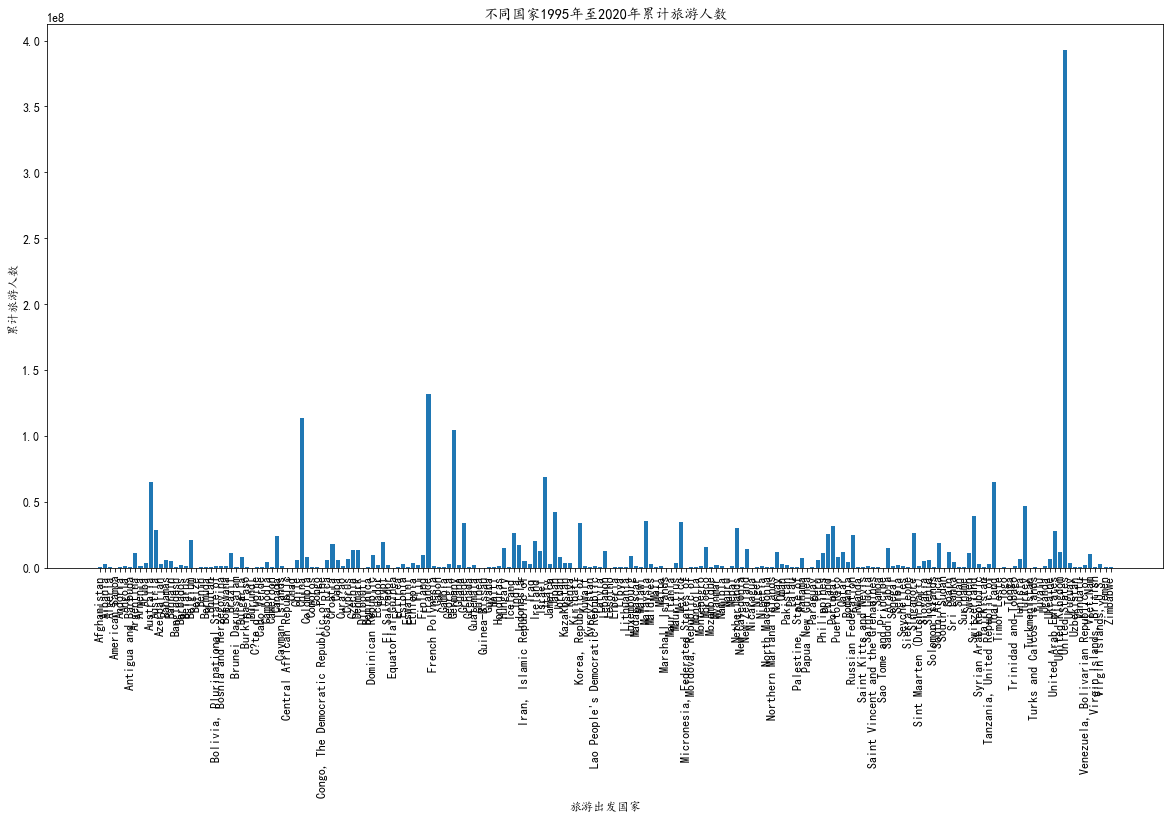

In [42]:
import matplotlib.pyplot as plt

# 更改字体避免乱码
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
# 创建一个柱状图
plt.figure(figsize=(20, 10))  # 设置图形尺寸为宽度10，高度6
plt.bar(grouped_by_country.index, grouped_by_country.values)
# plt.figure(figsize=(12,8))
plt.xlabel('旅游出发国家')
plt.ylabel('累计旅游人数')
plt.xticks(rotation=90)  # 旋转X轴标签以便显示更多国家
plt.title('不同国家1995年至2020年累计旅游人数')
plt.tight_layout()

# 显示图表
plt.show()


只显示前十的国家

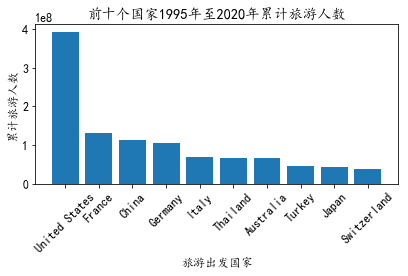

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件，使用GBK编码
csv_file = './data/A.csv'  # 替换为您的CSV文件路径
data = pd.read_csv(csv_file, encoding='gb2312')

# 按国家进行分类汇总统计
grouped_by_country = data.groupby('旅游出发国家')['国际旅游人数'].sum()

# 选择前十个国家
top_countries = grouped_by_country.nlargest(10)
# 更改字体避免乱码
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 创建柱状图
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('旅游出发国家')
plt.ylabel('累计旅游人数')
plt.title('前十个国家1995年至2020年累计旅游人数')
plt.xticks(rotation=45)  # 旋转X轴标签以便显示更多国家
plt.tight_layout()

# 显示图表
plt.show()
